In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client_data = pd.read_csv('client_data (1).csv')
price_data = pd.read_csv('price_data (1).csv')

 Explore the Datasets


In [3]:
# Check first few rows
print(client_data.head())
print(price_data.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t

In [4]:
# Check shape
print("Client Data Shape:", client_data.shape)
print("Price Data Shape:", price_data.shape)

Client Data Shape: (14606, 26)
Price Data Shape: (193002, 8)


In [5]:
# Check data types
print(client_data.dtypes)
print(price_data.dtypes)

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [6]:
# Check missing values
print("Missing values in Client Data:\n", client_data.isnull().sum())
print("Missing values in Price Data:\n", price_data.isnull().sum())

Missing values in Client Data:
 id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64
Missing values in P

4. Descriptive Statistics


In [7]:
print(client_data.describe())
print(price_data.describe())

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000

5. Plot Distributions

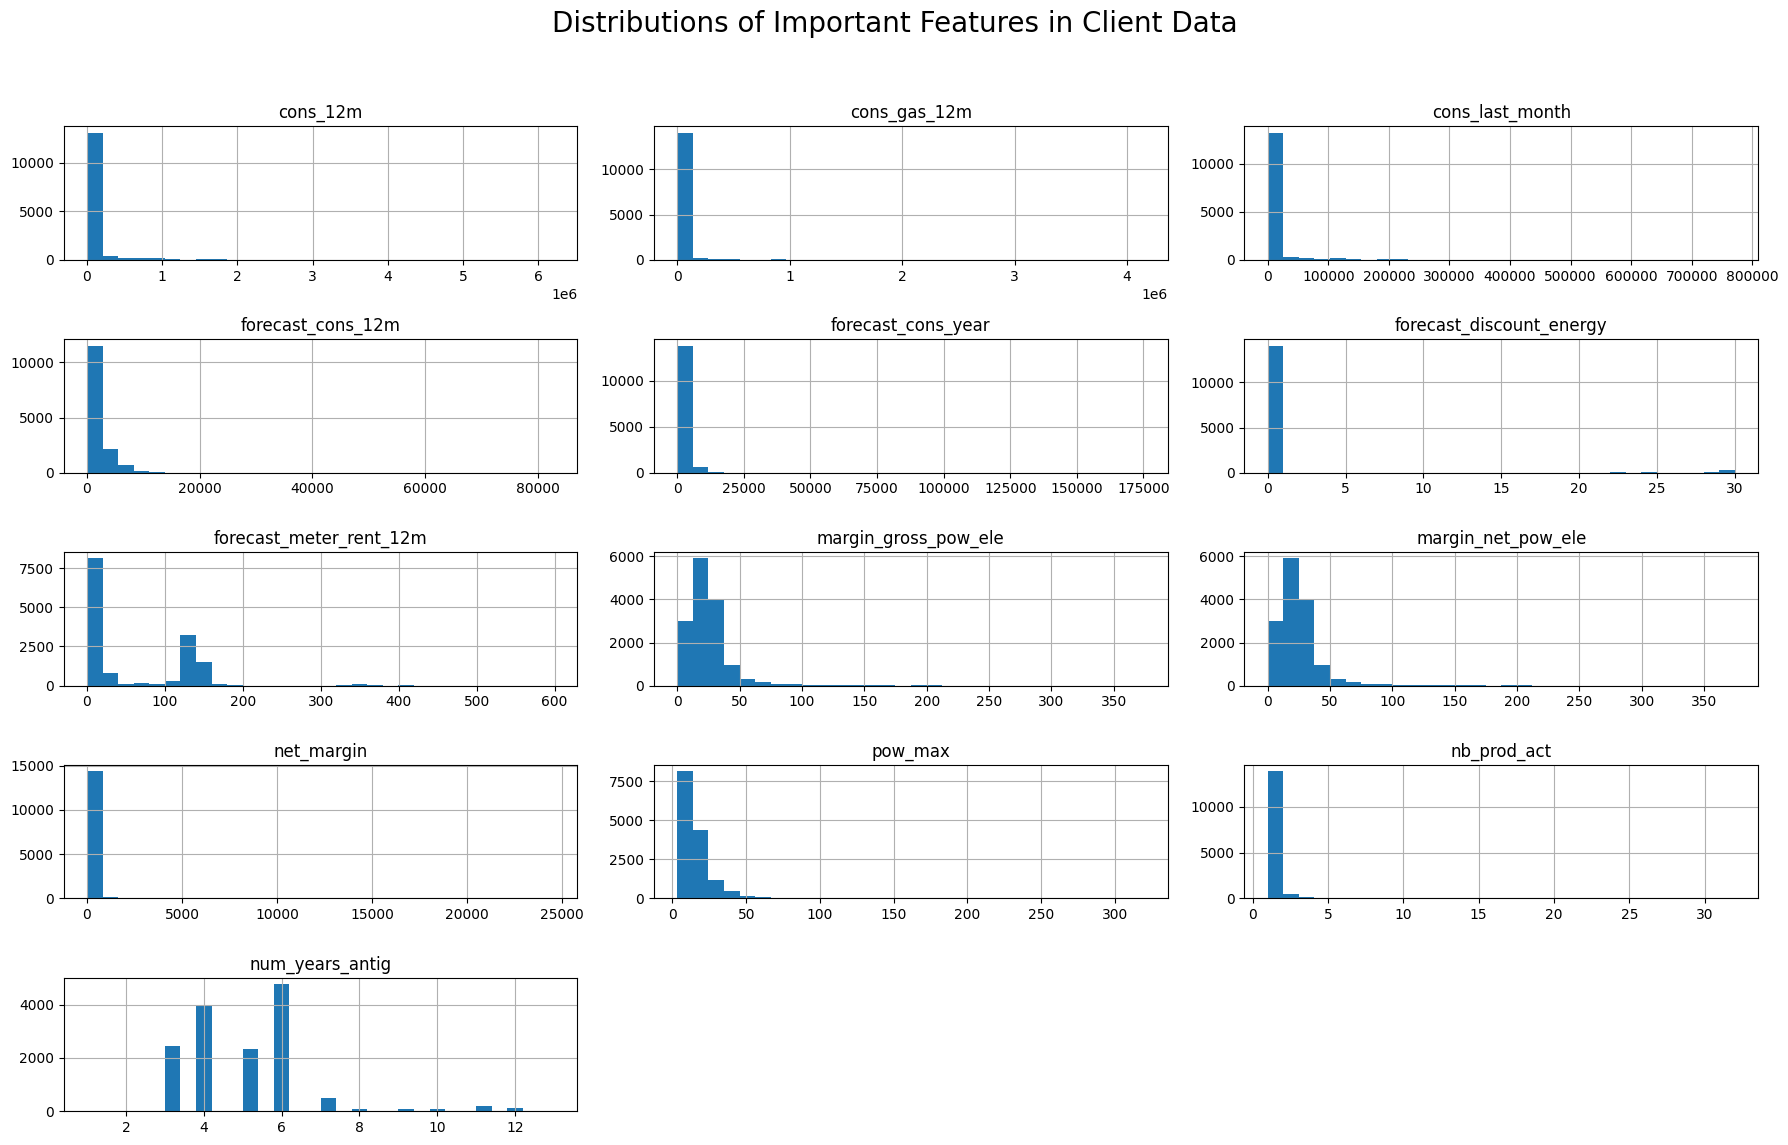

In [16]:
important_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
                     'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m',
                     'margin_gross_pow_ele', 'margin_net_pow_ele',
                     'net_margin', 'pow_max', 'nb_prod_act', 'num_years_antig']

client_data[important_columns].hist(figsize=(18, 12), bins=30, layout=(5, 3))
plt.suptitle('Distributions of Important Features in Client Data', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


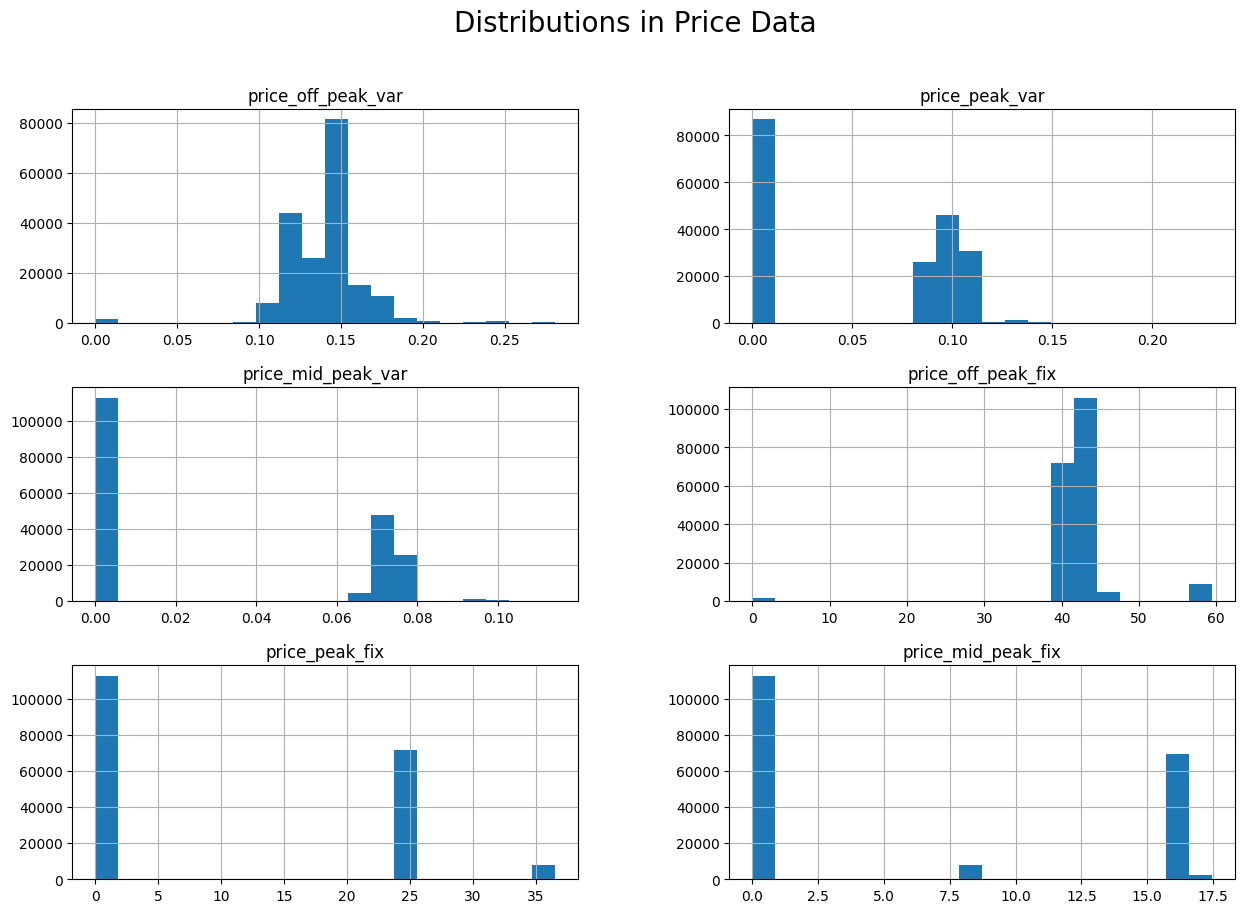

In [17]:
# Price Data distributions
price_data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distributions in Price Data', fontsize=20)
plt.show()

6. Boxplots to Detect Outliers

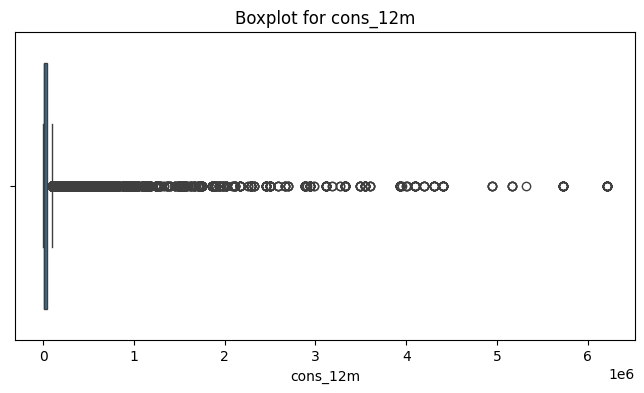

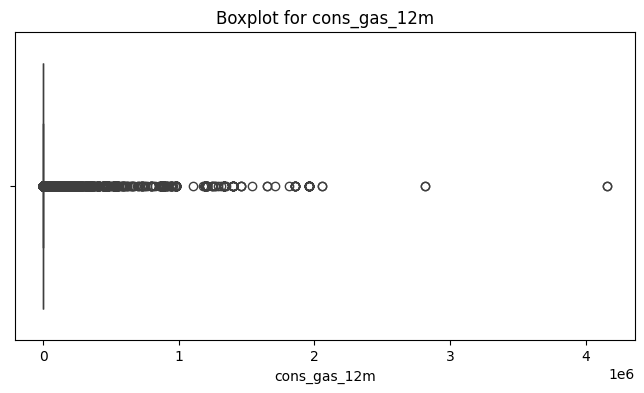

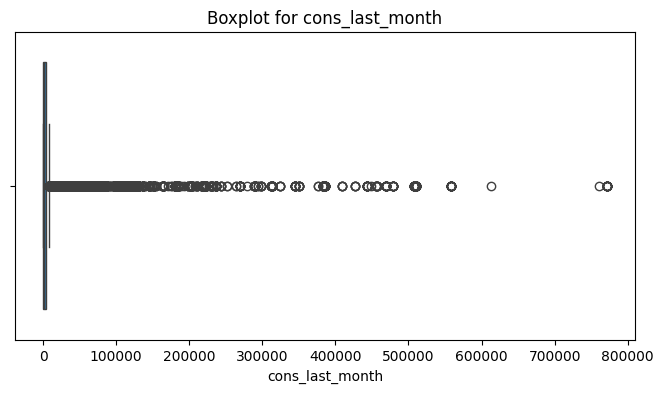

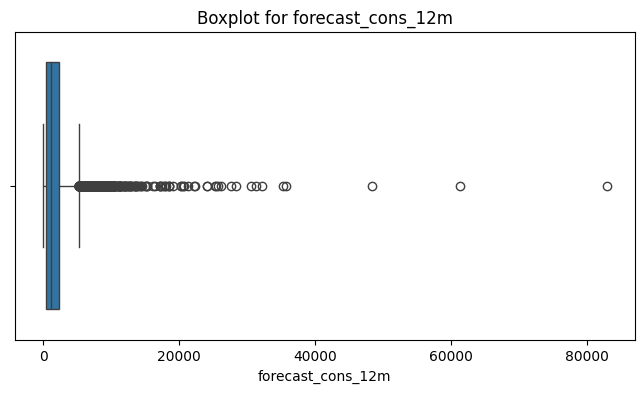

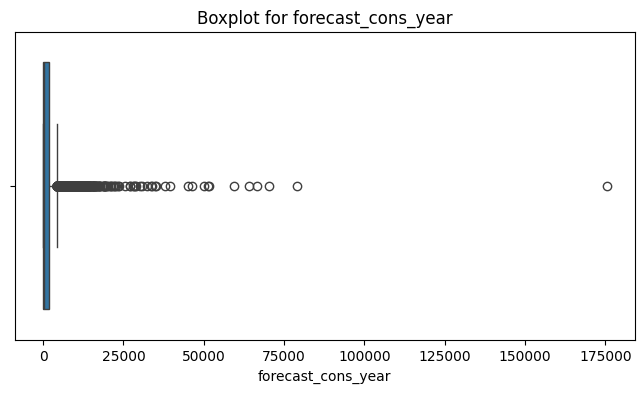

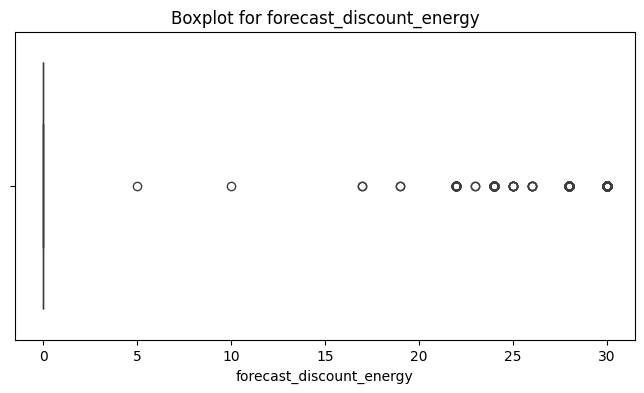

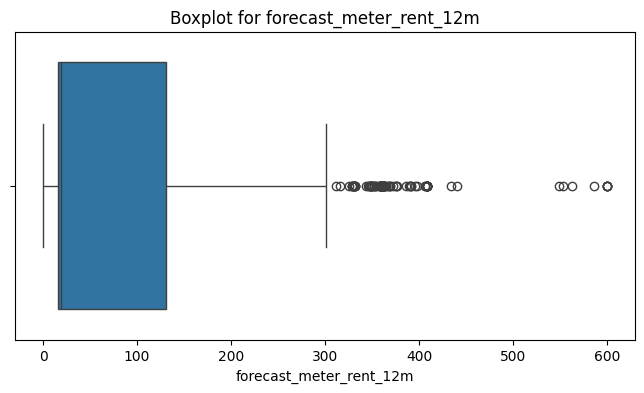

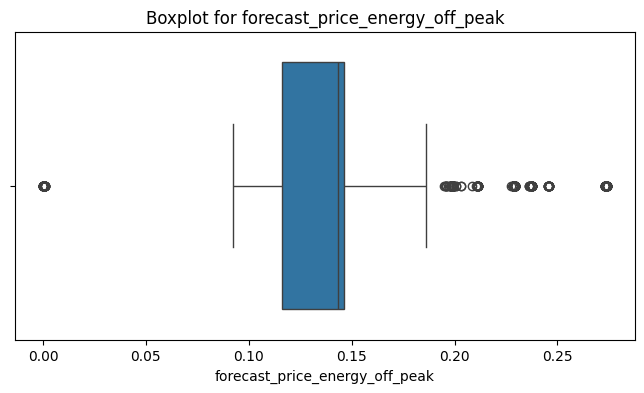

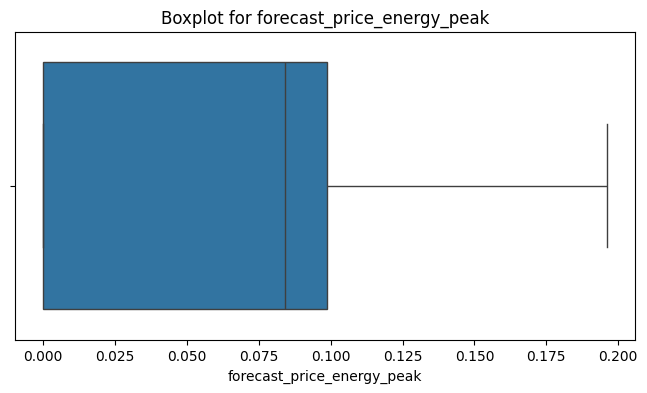

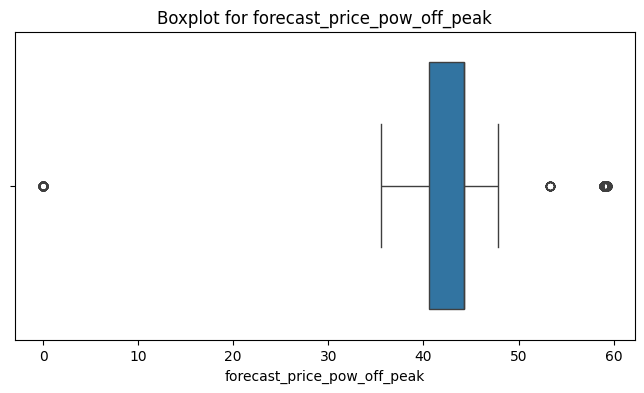

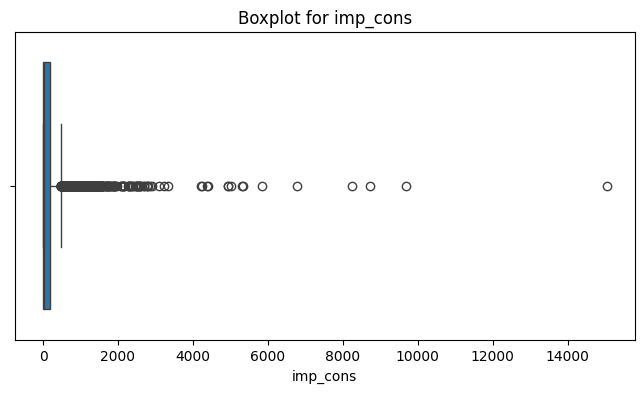

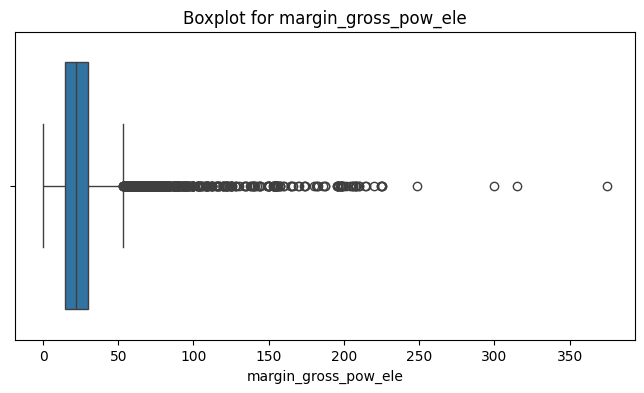

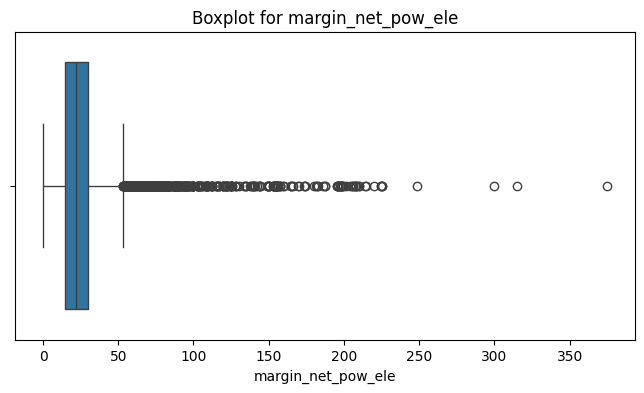

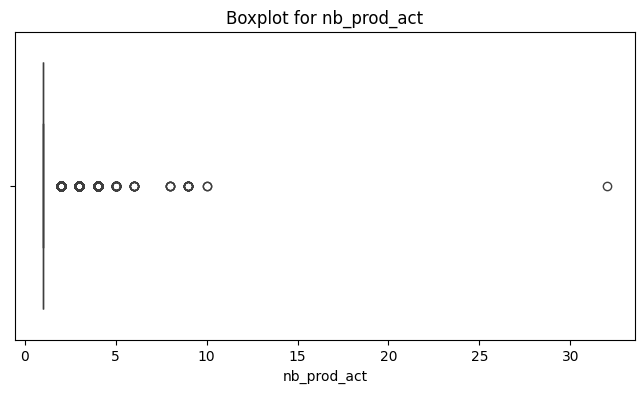

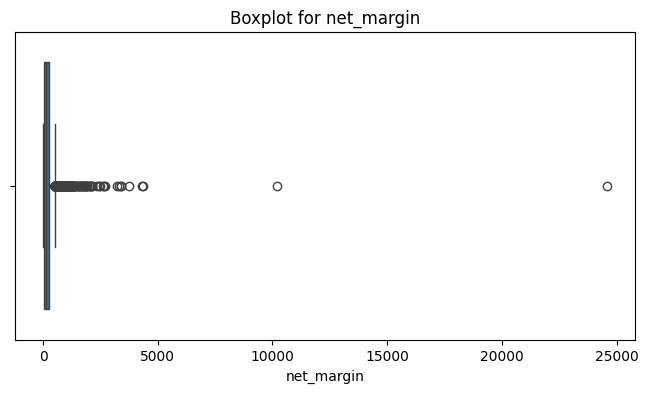

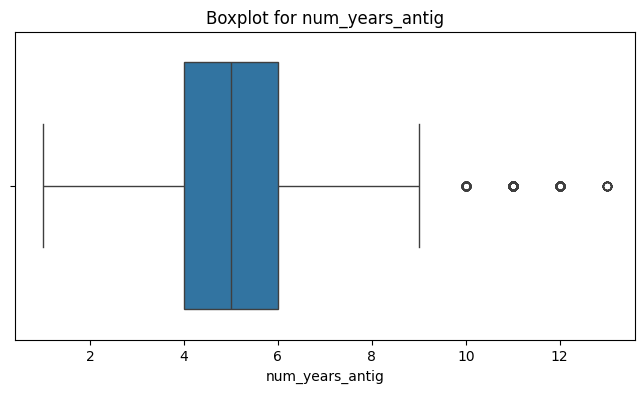

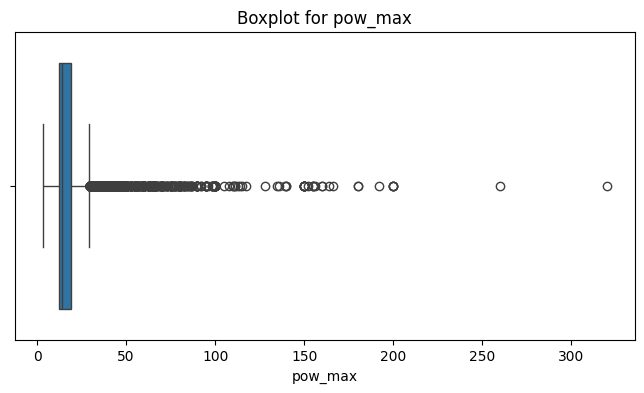

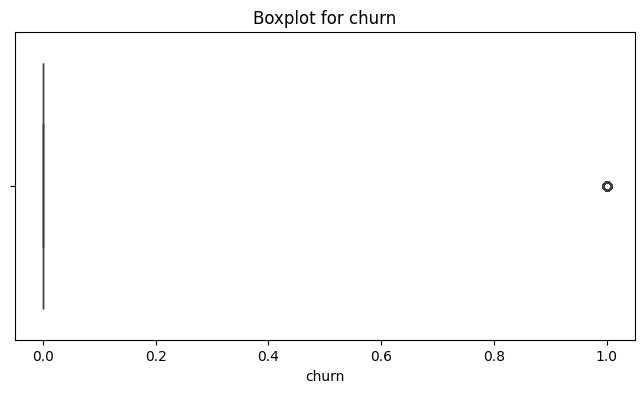

In [18]:
# Boxplots for numerical columns
for col in client_data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=client_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

7. Churn Analysis


churn
0    13187
1     1419
Name: count, dtype: int64


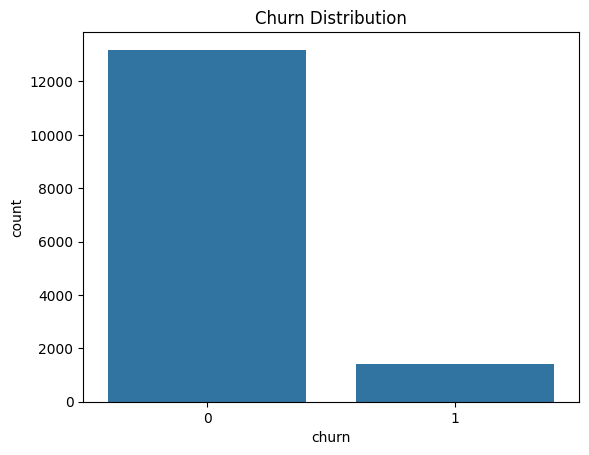

In [19]:
# Check churn value counts
print(client_data['churn'].value_counts())

# Plot churn distribution
sns.countplot(x='churn', data=client_data)
plt.title('Churn Distribution')
plt.show()

## Observations:

- The client data includes customer consumption, forecasted usage, margins, and churn labels.
- Some features like `cons_12m`, `cons_last_month`, and `net_margin` show right-skewed distributions, with a few high-value outliers.
- There are some missing values that may need to be handled before modeling.
- Most customers have not churned, but there is still a significant churn rate that should be analyzed.
- Correlation analysis shows that consumption features and net margin have meaningful relationships that could influence churn.
- Pricing data contains different fixed and variable prices across periods, which can be merged later based on `id` and `price_date` for deeper analysis.
